<a href="https://colab.research.google.com/github/wonjae124/Pytorch-tutorial/blob/main/Colab_Notebook_GitHub_TRAINING_A_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#미니배치, 에폭의 관계 https://mole-starseeker.tistory.com/59
 
import torch
import torchvision
import torchvision.transforms as transforms


In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size, shuffle=True, num_workers = 2)
testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle = False, num_workers = 2 )

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(trainset[0][0].shape)
print(testset[0][0].shape)
print(trainset)
print(len(trainloader))

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
12500


In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))   # 3 by 32 by 32 -> 32 by 32 by 3
    plt.show()

In [31]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(dataiter))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>
<class 'torch.Tensor'>
torch.Size([4, 3, 32, 32])
torch.Size([4])


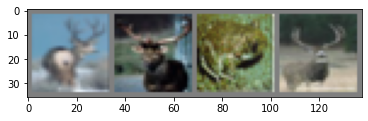

deer  deer  frog  deer 


In [32]:
imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [33]:
train_t = np.transpose(images,(0,2,3,1)) # 4 by 3 by 32 by 32 -> 4 by 32 by 32 by 3
train_t.shape

torch.Size([4, 32, 32, 3])

In [34]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외하고 flatten 하겠다??
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [35]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [36]:
for epoch in range(2): #총 epoch은 2회다. epoch = 0, 1까지다.

    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward
        optimizer.step()

        running_loss += loss.item()
        if i%2000 == 1999: #2000개의 미니배치마다 출력한다. 현재 배치사이즈는 4다. CIFAR10은 총 50000개의 데이터셋이므로 12
            print(f'[{epoch+1}, {i+1:5d}] loss: {running_loss / 2000 :.3f}')
            running_loss = 0.0



[1,  2000] loss: 2.305
[1,  4000] loss: 2.304
[1,  6000] loss: 2.305
[1,  8000] loss: 2.306
[1, 10000] loss: 2.305
[1, 12000] loss: 2.305
[2,  2000] loss: 2.304
[2,  4000] loss: 2.304
[2,  6000] loss: 2.305
[2,  8000] loss: 2.306
[2, 10000] loss: 2.304
[2, 12000] loss: 2.305


In [37]:
print('Finished Training')

Finished Training
